In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(img_shape), cmap='binary')
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

In [3]:
def plot_example_errors(cls_pred):
    incorrect = (cls_pred != y_test)
    ims = x_test_flat[incorrect]
    cls_pred = cls_pred[incorrect]
    cls_true = y_test[incorrect]
    plot_images(images=ims[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

Load some data. The MNIST dataset contains 70000 handwritten digits with corresponding number labels:

In [4]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Reshape the data to prepare it for the classifier
img_shape = [x_train.shape[1],x_train.shape[2]]

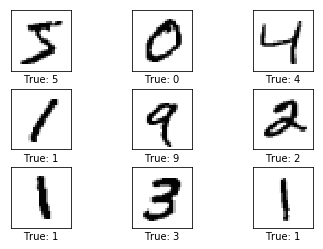

In [5]:
test_images = x_train[0:9]
classes_true = y_train[0:9]
plot_images(test_images, classes_true)

In [6]:
batch_size = 128
num_classes = 10
epochs = 20

# Pre-process the training and test set
# Reshape arrays 
x_train_flat = x_train.reshape(60000, 784)
x_test_flat = x_test.reshape(10000, 784)

# Change the type of values to float 
x_train_flat = x_train_flat.astype('float32')
x_test_flat = x_test_flat.astype('float32')

# Normalize the data
x_train_flat /= 255
x_test_flat /= 255

# convert class vectors to binary class matrices
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

print(x_train_flat.shape[0], 'training samples')
print(x_test_flat.shape[0], 'test samples')

60000 training samples
10000 test samples


We split the input data into 60000 training samples and 10000 for testing.

Next, we define a three layer network with 512 neurons for the first two layers, and 10 (`num_classes`, i.e. the digits 0-9) for the final layer:

In [7]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Let's print a summary of the model.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Now, run train the network:

In [8]:
# Epochs are the number of times we show the training set to our model
epochs = 1

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_flat, y_train_cat,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_flat, y_test_cat))
score = model.evaluate(x_test_flat, y_test_cat, verbose=0)
print('Test loss:', score[0])
print('Test accuracy, the percentage of digits we predict accurately is :', 100*score[1], '%')

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 3s 44us/step - loss: 0.2237 - acc: 0.9301 - val_loss: 0.1194 - val_acc: 0.9651
Test loss: 0.11935029869154096
Test accuracy, the percentage of digits we predict accurately is : 96.50999999999999 %


In [9]:
predictions = model.predict(x_test_flat)
class_pred = np.argmax(predictions, axis=1)

Good predictions:

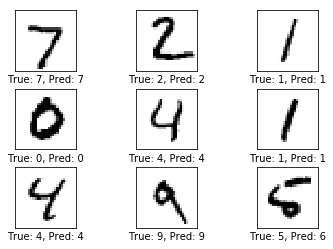

In [10]:
plot_images(x_test_flat[0:9], y_test[0:9], class_pred[0:9])

Errored predictions:

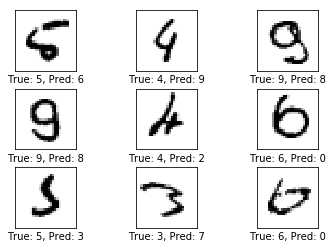

In [11]:
plot_example_errors(class_pred)